# Running Biomechanics Data Set processed files

Reginaldo K Fukuchi, Jan 2023, reginaldo.fukuchi@ufabc.edu.br

This NB prepares data to e exported as RBDSxxxxprocessed.txt

In [1]:
# Prepare environment
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
subject = 'SUB0051'
side   = ['Right','Left'];

In [4]:
if subject=='SUB0042' or subject=='SUB0041' or subject=='SUB0044':
    speed = [25,35,45];
else:
    speed = [35];

In [5]:
# Import data
pathname = r'C:\Users\Reginaldo\Documents\data\CNPq\RBDS_v2\RBA';
pathDir = os.path.join(pathname, subject)

In [6]:
joints = ['hip','knee','ankle'];
varListRBA = ['Stride_Length','Strides_Per_Minute','Stride_Width'];
direction = ['X','Y','Z']

## Emsemble avg angles, moments, powers and GRFs

In [7]:
# preallocate
angs_data = np.empty(shape=(101,len(speed),len(side),len(joints),len(direction),1))*np.NaN
moms_data = np.empty(shape=(101,len(speed),len(side),len(joints),len(direction),1))*np.NaN
pows_data = np.empty(shape=(101,len(speed),len(side),len(joints),1))*np.NaN
grfs_data = np.empty(shape=(101,len(speed),len(side),len(direction),1))*np.NaN

grfs_trials= np.empty(shape=(101,len(speed),len(side),len(joints),100))*np.NaN 
angs_trials= np.empty(shape=(101,len(speed),len(side),len(joints),100))*np.NaN 

for v, velo in enumerate(speed):
    # Import Temporal Distance Gait Parameters
    # Read columns
    filename = os.path.join(pathDir,'RUNT'+str(speed[v])+'tempSpatGaitParams.txt')
    head_SPTparams = pd.read_csv(filename, delimiter='\t', header=1)
    SPTparams_labels = head_SPTparams.columns.tolist()
    # Read data only
    data_SPTparams = pd.read_csv(filename, delimiter='\t', skiprows=4)
    # Create another df
    df_SPT = pd.DataFrame(data=data_SPTparams.values, columns=SPTparams_labels)
    df_SPT.drop(labels='Unnamed: 0', axis=1, inplace=True)

    spt_labels = []
    for s, sid in enumerate(side):
        #### SPATIOTEMPORAL PARAMETERS
        for stp, stpars in enumerate(varListRBA):
            if stpars=='Stride_Width':
                varFullName = stpars + '_Mean'
            else:
                varFullName = sid+'_'+stpars+'_Mean'
            # Columns names of the STP of interest
            spt_labels.append(varFullName)


        for j, joint in enumerate(joints):        

            # Filename for angles
            fname_angs= os.path.join(pathDir,'RUN'+str(speed[v])+sid[0]+joint+'Ang.txt')
            df_angs   = pd.read_csv(fname_angs, delimiter='\t', skiprows=4)
            df_angs   = df_angs.iloc[:,1:]
            # Filename for moments
            fname_moms= os.path.join(pathDir,'RUN'+str(speed[v])+sid[0]+joint+'Mom.txt')
            df_moms   = pd.read_csv(fname_moms, delimiter='\t', skiprows=4)
            df_moms   = df_moms.iloc[:,1:]
            # Filename for powers
            fname_pows= os.path.join(pathDir,'RUN'+str(speed[v])+sid[0]+joint+'Pow.txt')
            df_pows   = pd.read_csv(fname_pows, delimiter='\t', skiprows=4)
            df_pows   = df_pows.iloc[:,1:]

            if joint=='hip': # Filename for GRFs        
                fname_grfs= os.path.join(pathDir,'RUN'+str(speed[v])+sid[0]+'grf.txt')
                df_grfs   = pd.read_csv(fname_grfs, delimiter='\t', skiprows=4)
                df_grfs   = df_grfs.iloc[:,1:]

            for xyz, axes in enumerate(direction):
                angs_data[:, v, s, j, xyz, 0] = df_angs.iloc[:,xyz::3].mean(axis=1, skipna=True)
                moms_data[:, v, s, j, xyz, 0] = df_moms.iloc[:,xyz::3].mean(axis=1, skipna=True)
            pows_data[:, v, s, j, 0] = df_pows.mean(axis=1, skipna=True)
            grfs_data[:, v, s, j, 0] = df_grfs.iloc[:,j::3].mean(axis=1, skipna=True)
            
            grfs_trials[:, v, s, j, 0:int(df_grfs.shape[1]/3)] = df_grfs.iloc[:,j::3]
            angs_trials[:, v, s, j, 0:int(df_angs.shape[1]/3)] = df_angs.iloc[:,2::3]

stp_params = df_SPT[spt_labels]

<IPython.core.display.Javascript object>


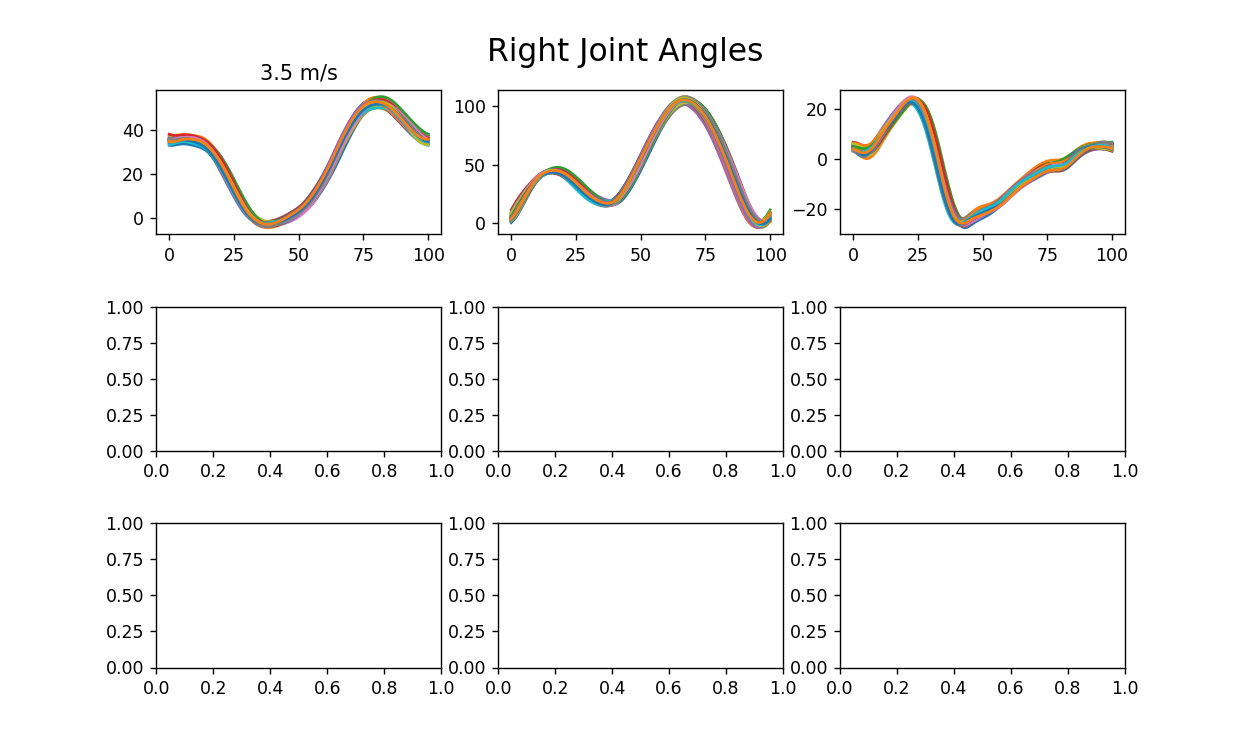

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Right Joint Angles", fontsize=18, y=0.95)
axs[0,0].plot(angs_trials[:, 0, 0, 0,:])
axs[0,0].set_title(str(speed[0]/10)+' m/s')
axs[0,1].plot(angs_trials[:, 0, 0, 1,:])
axs[0,2].plot(angs_trials[:, 0, 0, 2,:])
plt.show()

<IPython.core.display.Javascript object>


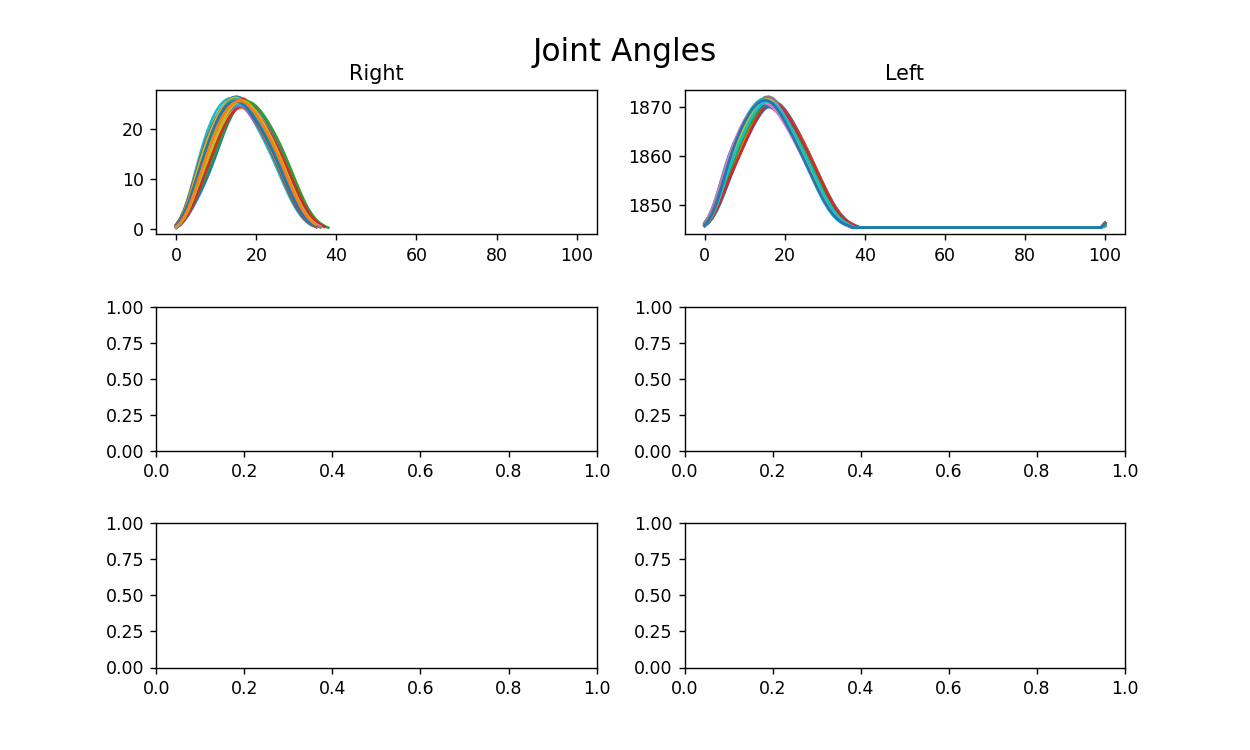

In [48]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Joint Angles", fontsize=18, y=0.95)
axs[0,0].plot(grfs_trials[:, 0, 0, 1,:])
axs[0,0].set_title(side[0])
axs[0,1].plot(grfs_trials[:, 0, 1, 1,:])
axs[0,1].set_title(side[1])
plt.show()

#### Column names consistent to the processed files in the RBDS study

In [49]:
cols = ['hipAngX', 'hipAngY', 'hipAngZ', 'kneeAngX', 'kneeAngY', 'kneeAngZ',
           'ankleAngX', 'ankleAngY', 'ankleAngZ', 'hipMomX', 'hipMomY', 'hipMomZ',
           'kneeMomX', 'kneeMomY', 'kneeMomZ', 'ankleMomX', 'ankleMomY', 'ankleMomZ',
           'grfX', 'grfY', 'grfZ', 'hipPow', 'kneePow', 'anklePow']

# List comprehension with column labels
columns = [side[s][0]+c+str(speed[v]) for s in range(len(side)) for v in range(len(speed)) for c in cols]

### Create array with angles, moments, GRFs and powers with order consistent with processed files

In [50]:
ncols_side = len(speed)*((len(joints)*len(direction)+len(joints)*len(direction))+len(direction)+len(joints))
side_data = np.empty(shape=(101,ncols_side*len(side)))
for s, sid in enumerate(side):
    speed_data = np.empty(shape=(101,24*len(speed)))
    for v, velo in enumerate(speed):
        angs = np.empty(shape=(101,len(joints)*len(direction)))
        moms = np.empty(shape=(101,len(joints)*len(direction)))
        pows = np.empty(shape=(101,len(joints)))
        grfs = np.empty(shape=(101,len(direction)))
        for j, joint in enumerate(joints):
            for xyz, axes in enumerate(direction):
                angs[:,3*j+xyz] = angs_data[:, v, s, j, xyz, 0] # Angles
                moms[:,3*j+xyz] = moms_data[:, v, s, j, xyz, 0] # Moments
                
            pows[:,j] = pows_data[:, v, s, j, 0] # Powers
            grfs[:,j] = grfs_data[:, v, s, j, 0] # GRFs
            
        speed_data[:, 24*v:24*(v+1)] = np.hstack([angs, moms, grfs, pows])
    side_data[:, ncols_side*s:ncols_side*(s+1)] = speed_data

### Create df

In [51]:
df_rbds = pd.DataFrame(data=side_data, columns=columns).round(6)
df_rbds['PercGcycle'] = list(range(0,101))
df_rbds.set_index('PercGcycle', inplace=True)
# Export to txt
path_D = r'C:\Users\Reginaldo\Documents\data\CNPq\RBDS_v2\Figshare_update'
df_rbds.to_csv(os.path.join(path_D,'RBDS0'+subject[-2:]+'processed.txt'), sep='\t')
df_rbds.head()

,RhipAngX35,RhipAngY35,RhipAngZ35,RkneeAngX35,RkneeAngY35,RkneeAngZ35,RankleAngX35,RankleAngY35,RankleAngZ35,RhipMomX35,...,LkneeMomZ35,LankleMomX35,LankleMomY35,LankleMomZ35,LgrfX35,LgrfY35,LgrfZ35,LhipPow35,LkneePow35,LanklePow35
PercGcycle,,,,,,,,,,,,,,,,,,,,,
0,0.569700,3.020678,35.407421,1.778495,-11.378532,5.019093,11.713160,-2.581867,4.924951,-0.291307,...,5483.698623,-6904.343727,2606.215332,-4578.086796,1845.562155,1846.018266,-1845.345579,4391.264886,-32525.436523,-10919.721829
1,1.631070,3.067593,35.322217,2.004692,-11.232866,8.141871,10.411524,-2.355230,4.465658,-0.152530,...,5504.273259,-7035.361649,2438.487222,-4502.681141,1845.556313,1846.982005,-1845.331552,6083.024095,-40825.163301,-21744.262148
2,2.868623,3.436595,35.393740,2.276078,-10.936562,11.626826,8.343555,-2.372380,3.918066,0.053927,...,5536.320622,-7149.100181,2294.892986,-4448.932343,1845.466302,1848.416891,-1845.318717,6339.351253,-47196.847561,-31031.489759
3,4.198574,4.131331,35.552023,2.663605,-10.404306,15.283322,5.649547,-2.851929,3.405901,0.301398,...,5579.111150,-7224.445158,2168.524614,-4432.915266,1845.230832,1850.315008,-1845.316507,5185.680788,-51545.790682,-35496.111423
4,5.529506,5.092276,35.716860,3.220808,-9.537990,18.952950,2.578140,-3.951944,3.077171,0.532262,...,5630.305998,-7245.601932,2050.550963,-4463.772640,1844.824258,1852.590025,-1845.334505,3064.496578,-54385.593179,-32775.406108


## Visualize data

In [65]:
cor = ['b','r','k']

## Hip, knee and ankle angles

<IPython.core.display.Javascript object>


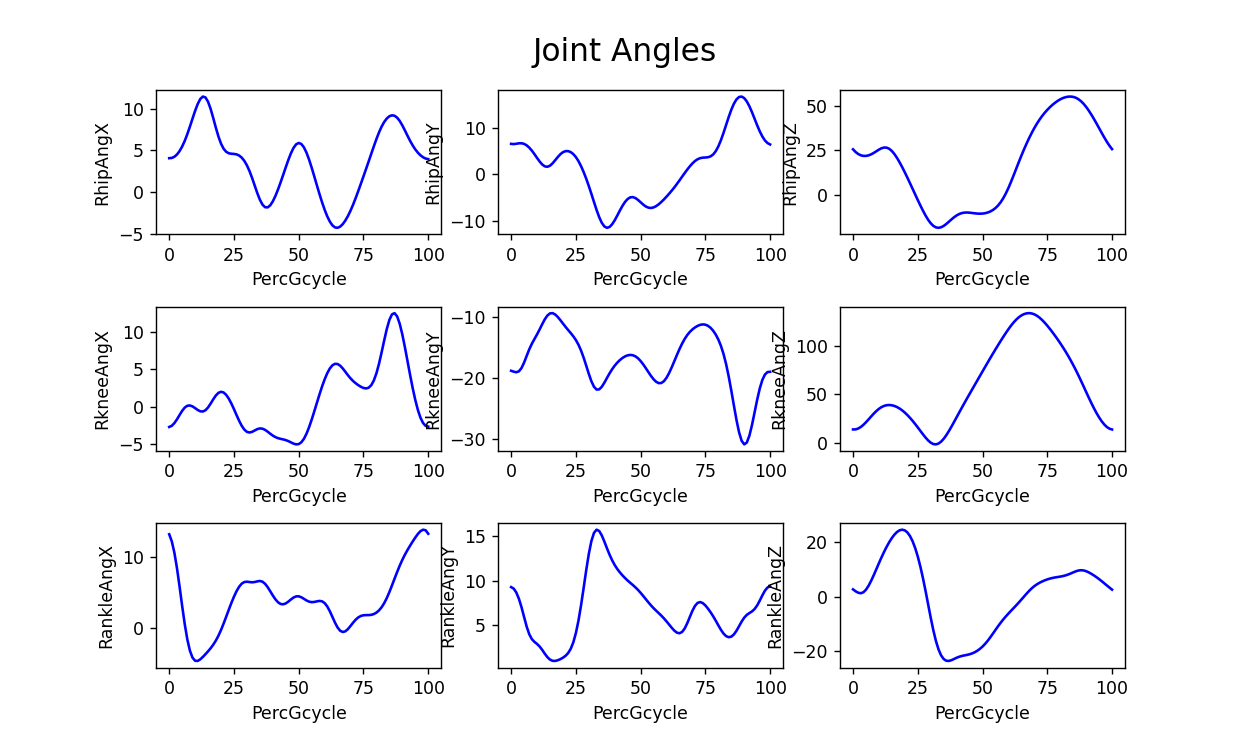

In [66]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Joint Angles", fontsize=18, y=0.95)

for j, joint in enumerate(joints):
    for xyz, axes in enumerate(direction):
        for v, vel in enumerate(speed):
            df_rbds.plot(y='R'+joint+'Ang'+axes+str(vel), use_index=True, ax=axs[j,xyz], 
                         legend=False, color=cor[v], ylabel='R'+joint+'Ang'+axes)

## Hip, knee and ankle moments

<IPython.core.display.Javascript object>


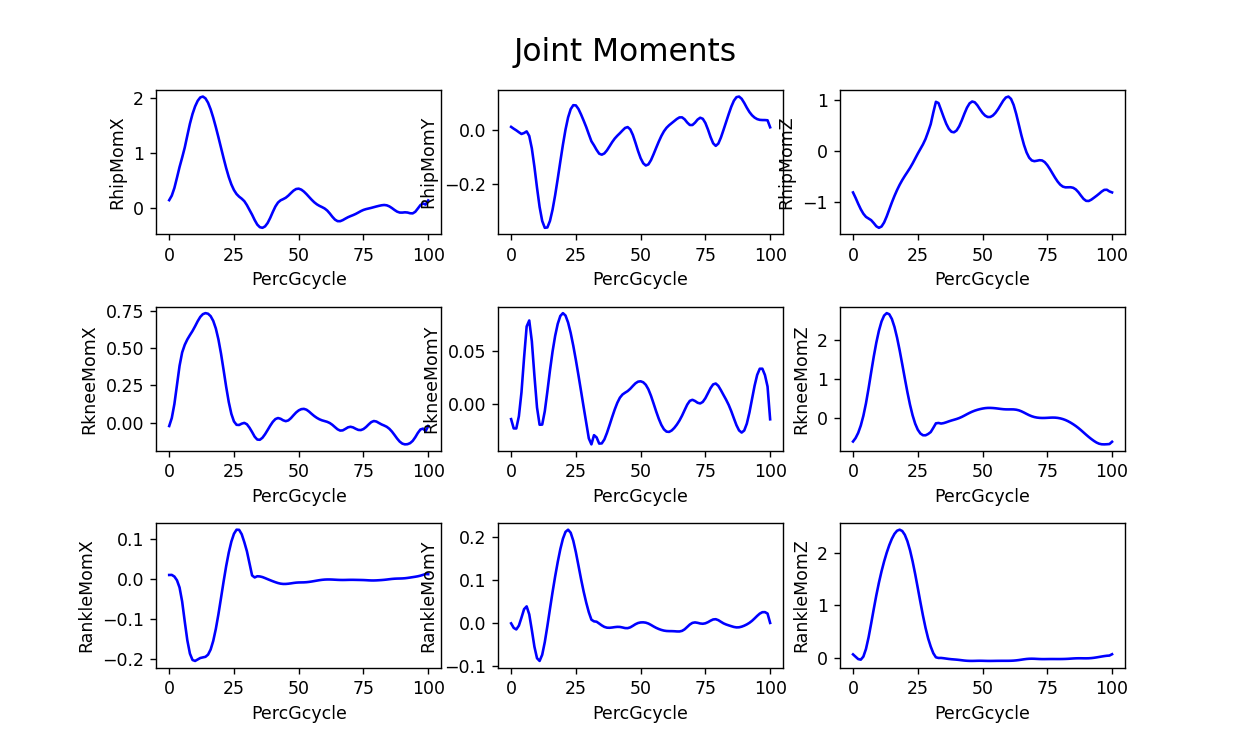

In [67]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Joint Moments", fontsize=18, y=0.95)

for j, joint in enumerate(joints):
    for xyz, axes in enumerate(direction):
        for v, vel in enumerate(speed):
            df_rbds.plot(y='R'+joint+'Mom'+axes+str(vel), use_index=True, ax=axs[j,xyz], 
                         legend=False, color=cor[v], ylabel='R'+joint+'Mom'+axes)

## Hip, knee and ankle powers

<IPython.core.display.Javascript object>


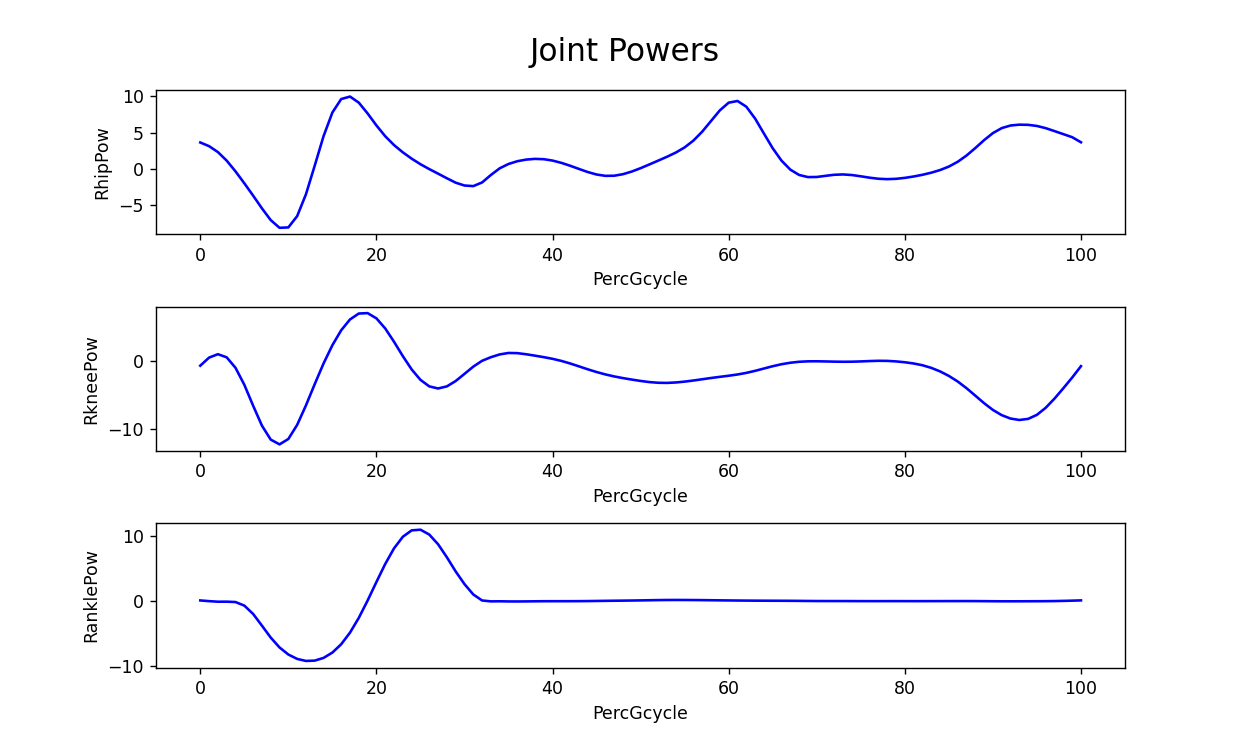

In [68]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Joint Powers", fontsize=18, y=0.95)

for j, joint in enumerate(joints):
    for v, vel in enumerate(speed):
        df_rbds.plot(y='R'+joint+'Pow'+str(vel), use_index=True, ax=axs[j], 
                     legend=False, color=cor[v], ylabel='R'+joint+'Pow')

## GRFs

<IPython.core.display.Javascript object>


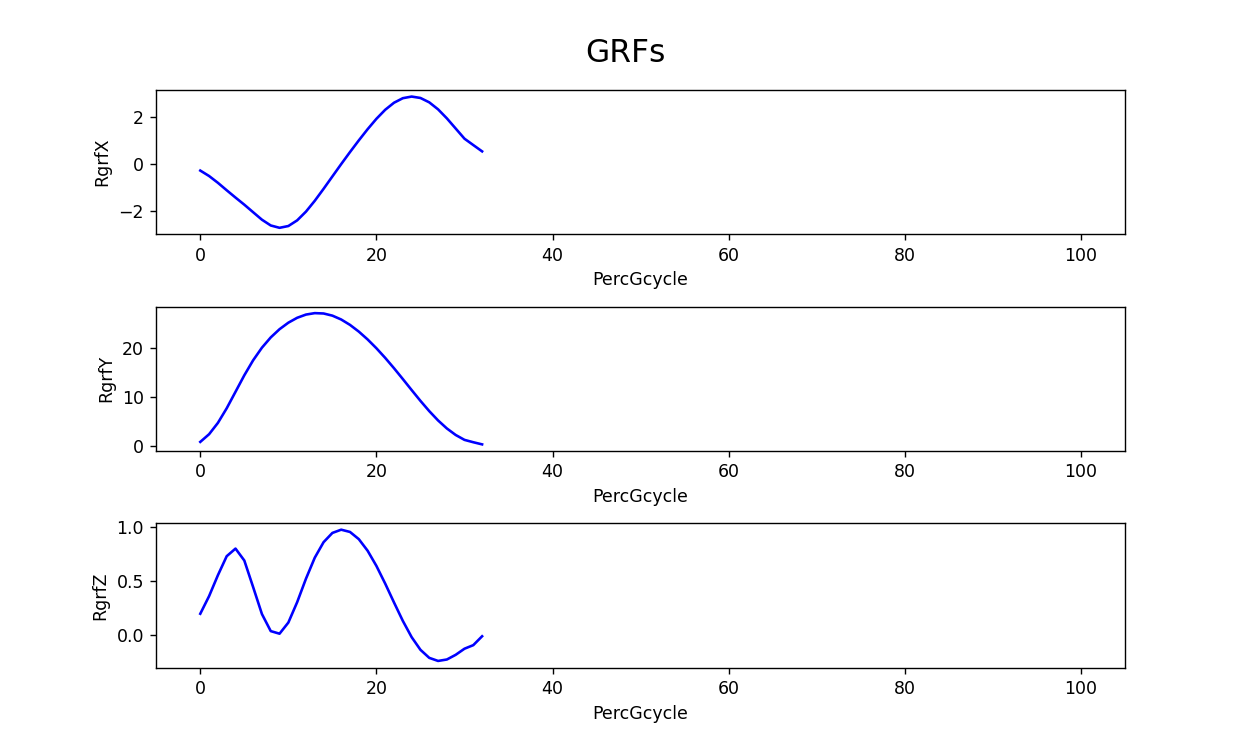

In [69]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("GRFs", fontsize=18, y=0.95)

for xyz, axes in enumerate(direction):
    for v, vel in enumerate(speed):
        df_rbds.plot(y='R'+'grf'+axes+str(vel), use_index=True, ax=axs[xyz], 
                     legend=False, color=cor[v], ylabel='R'+'grf'+axes)
        
plt.show()